# Loading EEG Data 
## Events:
Event  Description,
- 276: Idling EEG (eyes open),
- 277: Idling EEG (eyes closed),
- 768: Start of a trial,
- 769: Cue onset left (class 1),
- 770: Cue onset right (class 2),
- 771: Cue onset foot (class 3),
- 772: Cue onset tongue (class 4),
- 783: Cue unknown,
- 1023: Rejected trial,
- 1072: Eye movements,
- 32766: Start of a new run

{'1023': 1,
 '1072': 2,
 '276': 3,
 '277': 4,
 '32766': 5,
 '768': 6,
 '769': 7,
 '770': 8,
 '771': 9,
 '772': 10}

In [ ]:
pip install mne

In [ ]:
pip install --upgrade mne

In [5]:
import mne 

In [5]:
pip install numpy==1.26.4


Note: you may need to restart the kernel to use updated packages.


In [ ]:
raw = mne.io.read_raw_gdf('data/A01T.gdf', preload=False, eog=['EOG-left', 'EOG-central', 'EOG-right'])
print(raw.info)

In [9]:
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~26 KiB, data not loaded>

In [10]:
raw.annotations

<Annotations | 603 segments: 1023 (15), 1072 (1), 276 (1), 277 (1), 32766 ...>

In [21]:
events, event_id = mne.events_from_annotations(raw)
event_id

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


{'1023': 1,
 '1072': 2,
 '276': 3,
 '277': 4,
 '32766': 5,
 '768': 6,
 '769': 7,
 '770': 8,
 '771': 9,
 '772': 10}

In [27]:
events[0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [28]:
event_dict = {'reject': 1, 'eye move': 2, 'eye open': 3, 'eye close': 4, 'new run': 5, 'new trial': 6, 'class 1': 7, 'class 2': 8,'class 3':9,'class 4':10}

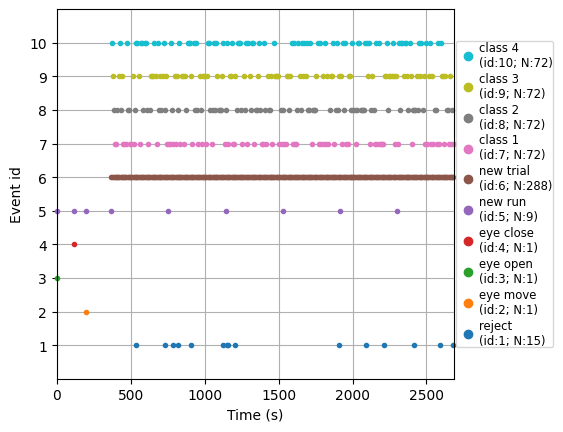

In [33]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

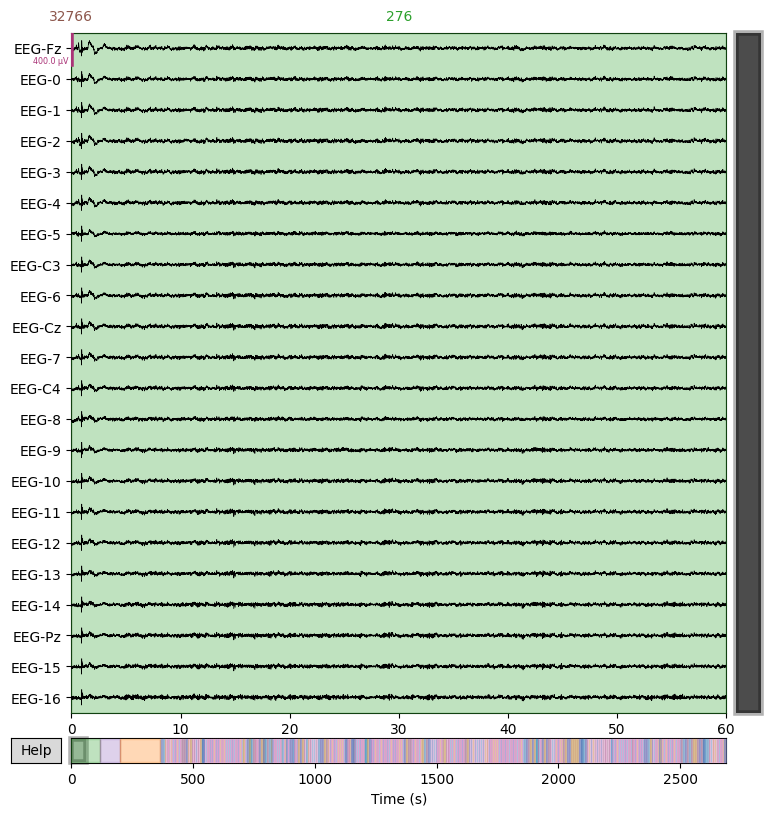

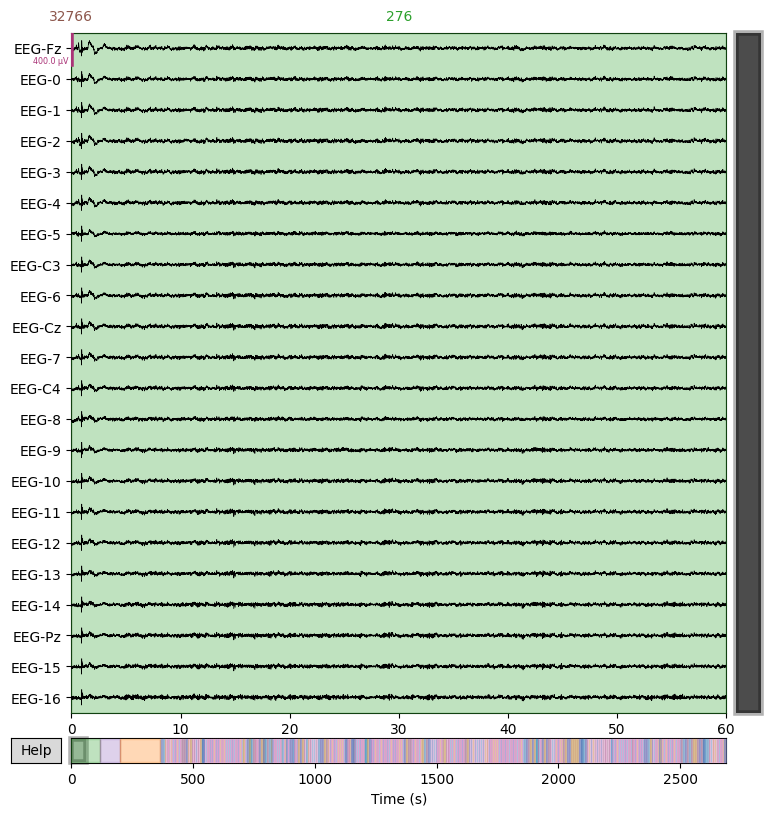

In [43]:
raw.plot(start=0, duration=60, n_channels=64, scalings=dict(eeg=20e-5))
# explain the plot: 64 channels, 60 seconds, 20e-5 eeg scale    

## Extracting only classes

In [56]:
epochs = mne.Epochs(raw, events, event_id=[7,8,9,10], tmin=-0.2, tmax=0.7, baseline=None, preload=True)
print(epochs)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Loading data for 288 events and 226 original time points ...
0 bad epochs dropped
<Epochs | 288 events (all good), -0.2 – 0.7 s (baseline off), ~11.0 MiB, data loaded,
 '7': 72
 '8': 72
 '9': 72
 '10': 72>


In [57]:
epochs.get_data().shape

(288, 22, 226)

In [58]:
labels = epochs.events[:,-1] # get the labels from the last channel of the events array
print(labels)

[10  9  8  7  7  8  9 10  8  9  7  7  7 10  8  8  7  7  9  7  8 10 10  9
  7 10 10  8 10 10  8  7  8  9  9  9 10  9  7 10  8  9  8  9 10  8  9  7
  7  7 10  8  7  9  7  9  8 10  7  9  9  7  9  8 10 10 10  9  7 10  8 10
  8  7  9  8  7  9  9  7  9 10 10  8  7  8 10  8 10  9  8  8  8  9 10  7
  8 10  7  9  9 10  7  7  9  8 10 10 10  8  7  9  8 10  7 10  9  8 10 10
  7  8  8  9 10  8  7  7 10  8  7  9  8  8  9  7 10  9  9  9  9  7  8  7
  8  7  7  9  9  8  9 10  7 10  7  7  8 10  9  8 10  9 10  9 10  8  8 10
  7  8  8  8  9 10  7 10  7  9  7 10  7  9  7  8  9  9 10  7  8 10  8  9
  9  7 10  8 10  7  7  9  9  8 10  8  8  7  8 10 10  8  8  8  8 10 10  9
 10  7  8  9  8  7 10  7 10  7  7  7  7  9  9 10  8  9  9  9 10  9  7  9
  7 10  8 10 10  9 10 10  9  8 10  9  7  8  8  8  9  8 10  9 10  8  9  7
 10  7  9 10  7  9  7  8  8  7 10  7 10  9  9  7  9  8  8  7  9  7  8  7]


combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


combining channels using GFP (eeg channels)


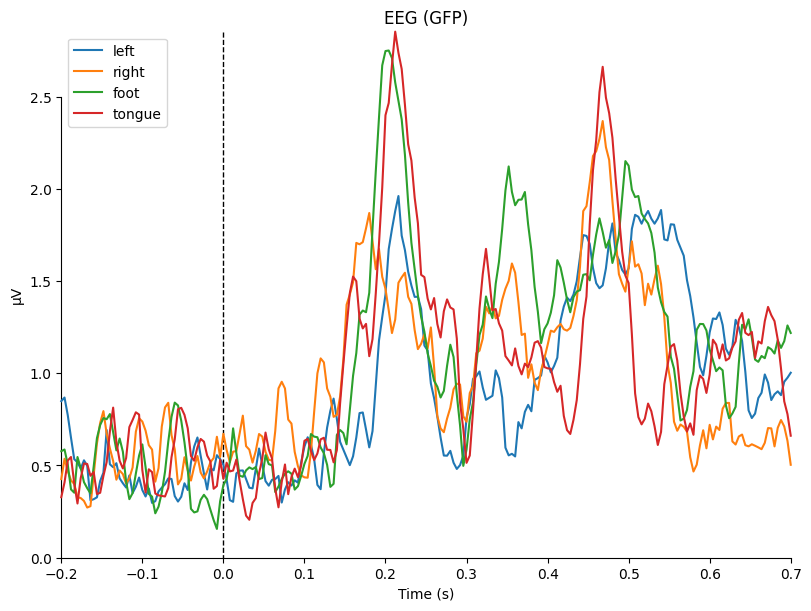

[<Figure size 800x600 with 1 Axes>]

In [59]:
evoked_1 = epochs['7'].average() 
evoked_2 = epochs['8'].average()
evoked_3 = epochs['9'].average()
evoked_4 = epochs['10'].average()
evoked_dict = {'left': evoked_1, 'right': evoked_2, 'foot': evoked_3, 'tongue': evoked_4}

mne.viz.plot_compare_evokeds(evoked_dict, picks='eeg')


# Creating a pipeline

In [2]:
import numpy as np

In [3]:
def read_data(path):
    raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
    labels=epochs.events[:,-1]
    features=epochs.get_data()
    return features,labels

In [ ]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'data/A0{i}T.gdf')
  features.append(feature) # append the features of eeg data
  labels.append(label) # append the labels of the eeg data
  groups.append([i]*len(label)) # append the group number of the eeg data

In [7]:
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

((2448, 22, 176), (2448,), (2448,))

In [8]:
# check for missing values
np.isnan(features).sum()

0

In [9]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([ 7,  8,  9, 10]), array([648, 648, 576, 576], dtype=int64))

In [10]:
unique, counts = np.unique(groups, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([288, 288, 288, 144, 288, 288, 288, 288, 288], dtype=int64))

In [11]:
%%capture
pip install pandas

In [12]:
# put data into a dataframe
import pandas as pd

# Training a classifier model

In [1]:
%%capture
pip install scikit-learn

In [13]:
# import classifier models libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [16]:
X = pd.DataFrame(features.reshape(features.shape[0],-1))
y = pd.Series(labels)
groups = pd.Series(groups)


In [17]:
# Split data into training and testing sets
from sklearn.model_selection import GroupShuffleSplit

train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 42).split(X, y, groups=groups))
X_train, X_test = X.iloc[train_inds], X.iloc[test_inds]
y_train, y_test = y.iloc[train_inds], y.iloc[test_inds]

In [19]:
num_classes = len(np.unique(y))
num_classes

4

In [22]:
# Random Forest
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2))

Random Forest Accuracy: 35.85 (+/- 0.08)


In [23]:
# Support Vector Machine
clf = SVC()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2))

SVM Accuracy: 38.84 (+/- 0.07)


# Training a CNN Model

In [78]:
%%capture
pip install tensorflow,matplotlib

In [130]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt


In [70]:
X = features
y = labels
groups = groups


In [71]:
#add a channel dimension (e.g., as a "grayscale" image)
X = X[..., np.newaxis]
X.shape

(2448, 22, 176, 1)

In [72]:
print("Overall data stats:")
print("Min:", X.min())
print("Max:", X.max())
print("Mean:", X.mean())
print("Std:", X.std())

Overall data stats:
Min: -7.40087716549688e-05
Max: 6.930691044173352e-05
Mean: 8.144107633082994e-24
Std: 5.1479151924181475e-06


In [73]:
X_norm = np.empty_like(X)
for ch in range(X.shape[1]):
    channel_data = X[:, ch, :, 0]
    mean = channel_data.mean()
    std = channel_data.std()
    X_norm[:, ch, :, 0] = (channel_data - mean) / (std + 1e-6)
    
print("After normalization, overall mean:", X_norm.mean(), "std:", X_norm.std())

After normalization, overall mean: -2.272859754404658e-18 std: 0.8271930309892808


In [99]:
labels_series = pd.Series(labels)
print("Label counts:")
print(labels_series.value_counts())

Label counts:
8     648
7     648
10    576
9     576
Name: count, dtype: int64


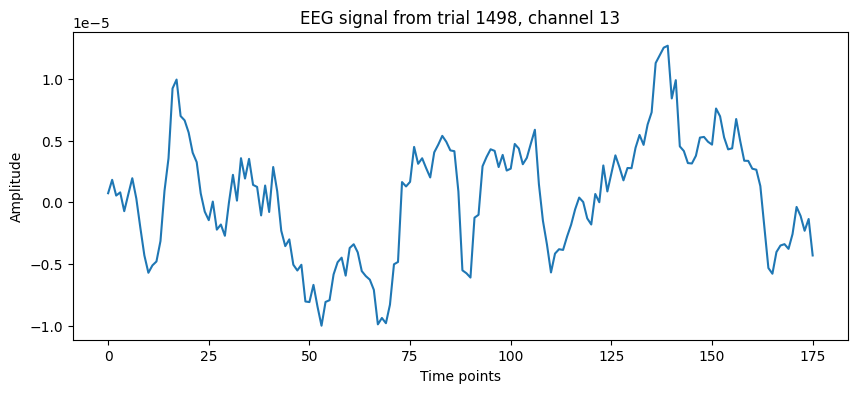

In [80]:
trial_idx = np.random.randint(0, X.shape[0])
channel_idx = np.random.randint(0, X.shape[1])
signal = X[trial_idx, channel_idx, :, 0]
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title(f"EEG signal from trial {trial_idx}, channel {channel_idx}")
plt.xlabel("Time points")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
subset_idx = np.random.choice(X_norm.shape[0], size=20, replace=False)
X_subset = X_norm[subset_idx]
y_subset = labels[subset_idx]


In [89]:
label_mapping = {7: 0, 8: 1, 9: 2, 10: 3}
y_mapped = np.vectorize(label_mapping.get)(y)

In [81]:
simple_model = Sequential([
    Flatten(input_shape=(22, 176, 1)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])
simple_model.compile(optimizer=Adam(learning_rate=0.01),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

c:\University\Junior\Medical Monitors\Tasks\Task 2\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
print(simple_model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │       123,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,068 (484.64 KB)

 Trainable params: 124,068 (484.64 KB)

 Non-trainable params: 0 (0.00 B)

None


In [88]:
history = simple_model.fit(X_subset, y_mapped, epochs=100, verbose=0)
print("Overfitting test - final training accuracy on small subset:",
      history.history['accuracy'][-1])

Overfitting test - final training accuracy on small subset: 1.0


## Full Data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_mapped, test_size=0.4, random_state=42)

In [91]:
num_classes = len(np.unique(y))
num_classes

4

## Creating a simple CNN

In [92]:
model = Sequential([
    InputLayer(input_shape=(22, 176, 1)),
    
    Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # reduced dropout
    
    Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # reduced dropout
    
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.35),  # reduced dropout
    
    Dense(num_classes, activation='softmax')
])

c:\University\Junior\Medical Monitors\Tasks\Task 2\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [94]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 22, 176, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 22, 176, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 88, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 11, 88, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 88, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 11, 88, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 44, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 5, 44, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 7040)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       450,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,132 (1.74 MB)

 Trainable params: 455,908 (1.74 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3732 - loss: 1.5237 - val_accuracy: 0.2415 - val_loss: 1.7642
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4772 - loss: 1.3324 - val_accuracy: 0.2415 - val_loss: 2.1189
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5482 - loss: 1.2124 - val_accuracy: 0.2313 - val_loss: 2.6661
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6337 - loss: 1.0134 - val_accuracy: 0.2381 - val_loss: 3.1766
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6483 - loss: 0.9925 - val_accuracy: 0.2449 - val_loss: 3.1800
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6434 - loss: 0.9211 - val_accuracy: 0.2109 - val_loss: 3.6223
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7214 - loss: 0.8424 - val_accuracy: 0.2653 - val_loss: 2.4276
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7519 - loss: 0.7699 - val_accuracy: 0.2517 - v

## Data Augmentation

In [112]:
def add_noise(x, noise_factor=0.05):
    # x is a single sample tensor of shape (22, 176, 1)
    x = x.astype(np.float32)
    noise = noise_factor * np.random.randn(*x.shape).astype(np.float32)
    return x + noise

def augment(x, y):
    # Use tf.numpy_function to wrap the augmentation function
    x_aug = tf.numpy_function(func=add_noise, inp=[x, 0.05], Tout=tf.float32)
    # Ensure the shape information is maintained:
    x_aug.set_shape(x.shape)
    return x_aug, y

In [113]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.AUTOTUNE)

In [114]:
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_ds = val_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [121]:
model2 = Sequential([
    InputLayer(input_shape=(22, 176, 1)),
    
    Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.1),
    
    Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
])

In [122]:
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [125]:
# Early stopping: stops training when validation loss hasn't improved for 5 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
# Learning rate scheduler: reduces LR by a factor of 0.5 if no improvement in val_loss for 3 epochs
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-6)


In [126]:
history2 = model2.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4512 - loss: 1.3693 - val_accuracy: 0.2745 - val_loss: 2.2269 - learning_rate: 5.0000e-04
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5039 - loss: 1.2299 - val_accuracy: 0.2704 - val_loss: 3.5116 - learning_rate: 5.0000e-04
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5808 - loss: 1.0906 - val_accuracy: 0.2643 - val_loss: 3.8103 - learning_rate: 5.0000e-04
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6637 - loss: 0.9337 - val_accuracy: 0.2643 - val_loss: 3.3880 - learning_rate: 5.0000e-04
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7081 - loss: 0.8193 - val_accuracy: 0.3061 - val_loss: 2.4366 - learning_rate: 5.0000e-04
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7696 - loss: 0.7002 - val_accuracy: 0.3112 - val_loss: 1.6607 - learning_rate: 5.0000e-04
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8198 

In [128]:
val_loss, val_accuracy = model2.evaluate(val_ds)
print("Final validation accuracy: {:.2f}%".format(val_accuracy * 100))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3545 - loss: 1.5216
Final validation accuracy: 35.00%


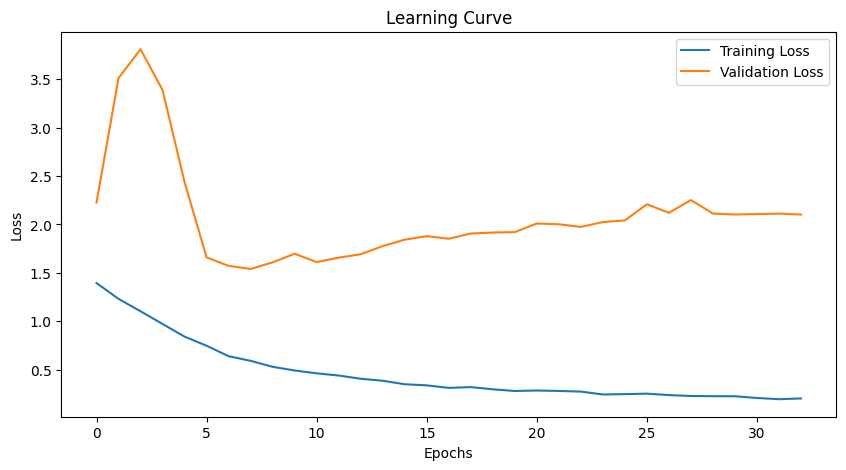

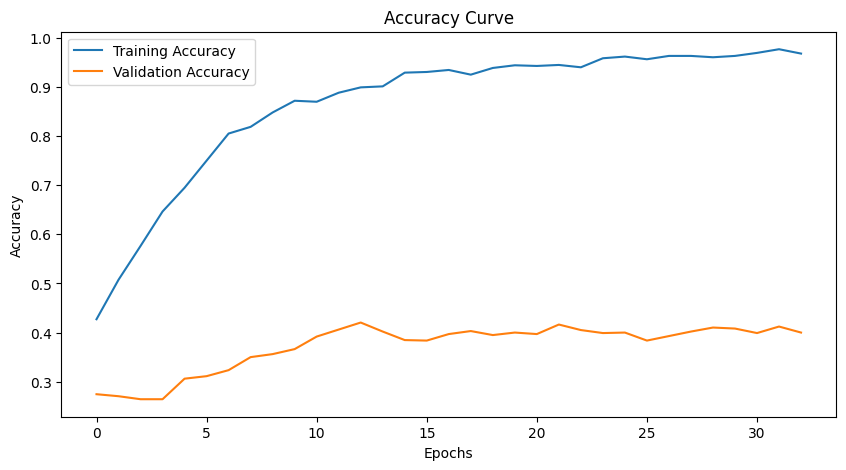

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [131]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_norm)):
    print(f"Fold {fold+1}")
    X_train_cv, X_val_cv = X_norm[train_index], X_norm[val_index]
    y_train_cv, y_val_cv = y_mapped[train_index], y_mapped[val_index]
    
    # Build and compile your model again here (or reset weights)
    model_cv = Sequential([
        InputLayer(input_shape=(22, 176, 1)),
        Conv2D(16, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    model_cv.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
    
    history_cv = model_cv.fit(X_train_cv, y_train_cv,
                              epochs=30,
                              batch_size=32,
                              validation_data=(X_val_cv, y_val_cv),
                              verbose=0)
    
    final_val_acc = history_cv.history['val_accuracy'][-1]
    print(f"Fold {fold+1} Validation Accuracy: {final_val_acc:.4f}")
    val_accuracies.append(final_val_acc)

print("Average Validation Accuracy from Cross-Validation: {:.2f}%".format(np.mean(val_accuracies)*100))

Fold 1


c:\University\Junior\Medical Monitors\Tasks\Task 2\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Fold 1 Validation Accuracy: 0.3776
Fold 2
Fold 2 Validation Accuracy: 0.3694
Fold 3
Fold 3 Validation Accuracy: 0.4122
Fold 4
Fold 4 Validation Accuracy: 0.3988
Fold 5
Fold 5 Validation Accuracy: 0.3885
Average Validation Accuracy from Cross-Validation: 38.93%
